Notatki do 3ciego podrozdzialu:
* gleboka analiza wynikow modelu
* shap values/lime?
* zaleznosc wielkosci bledu od wieku/mocy/spalania i innych zmienych ciaglych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_parquet('sim_results/final/sim3.parquet', engine='fastparquet')
print(df.shape)

(3759000, 11)


In [119]:
df['lm_error'] = df['lm'] - df['rand_y']
df['ridge_error'] = df['ridge'] - df['rand_y']
df['tree_error'] = df['tree'] - df['rand_y']
df['rf_error'] = df['rf'] - df['rand_y']

df['lm_error2'] = df['lm_error']**2
df['ridge_error2'] = df['ridge_error']**2
df['tree_error2'] = df['tree_error']**2
df['rf_error2'] = df['rf_error']**2

df

,rand_y,lm,ridge,tree,rf,observation,iteration,lm_error,ridge_error,tree_error,rf_error,lm_error2,ridge_error2,tree_error2,rf_error2
index,,,,,,,,,,,,,,,
0,-33223.042360,-35669.228516,-35641.664758,-37358.157300,-34059.546265,0,0,-2446.186155,-2418.622398,-4135.114939,-836.503905,5.983827e+06,5.849734e+06,1.709918e+07,6.997388e+05
1,-9329.248993,-12873.251953,-12546.614526,-19005.063775,-16185.682923,1,0,-3544.002960,-3217.365533,-9675.814781,-6856.433930,1.255996e+07,1.035144e+07,9.362139e+07,4.701069e+07
2,-1259.299682,-6993.388672,-6815.155180,4583.592395,3070.102545,2,0,-5734.088989,-5555.855498,5842.892078,4329.402227,3.287978e+07,3.086753e+07,3.413939e+07,1.874372e+07
3,-59140.775920,-58033.739258,-58018.802560,-60857.504261,-61923.855392,3,0,1107.036662,1121.973360,-1716.728341,-2783.079472,1.225530e+06,1.258824e+06,2.947156e+06,7.745531e+06
4,-7588.763648,-14928.028320,-15023.832768,-30701.319937,-22473.604620,4,0,-7339.264672,-7435.069119,-23112.556289,-14884.840972,5.386481e+07,5.528025e+07,5.341903e+08,2.215585e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,9631.773088,13520.456055,13493.272333,15878.535688,4481.894185,3754,499,3888.682967,3861.499245,6246.762600,-5149.878903,1.512186e+07,1.491118e+07,3.902204e+07,2.652125e+07
3755,16274.275503,23473.575195,23879.013390,20142.227195,15619.395319,3755,499,7199.299693,7604.737887,3867.951693,-654.880183,5.182992e+07,5.783204e+07,1.496105e+07,4.288681e+05
3756,18512.087027,40281.415039,40179.665081,16052.192591,17064.685865,3756,499,21769.328012,21667.578054,-2459.894436,-1447.401162,4.739036e+08,4.694839e+08,6.051081e+06,2.094970e+06


In [120]:
df_agg = df.groupby('observation').mean().reset_index()
df_agg.head(3)
print(df_agg.shape)

(3759, 15)


In [121]:
# BIAS
df_agg['lm_bias'] = df_agg['lm'] - df_agg['rand_y']
df_agg['ridge_bias'] = df_agg['ridge'] - df_agg['rand_y']
df_agg['tree_bias'] = df_agg['tree'] - df_agg['rand_y']
df_agg['rf_bias'] = df_agg['rf'] - df_agg['rand_y']
df_agg['lm_bias_relative'] = 100*df_agg['lm_bias']/df_agg['rand_y']
df_agg['ridge_bias_relative'] = 100*df_agg['ridge_bias']/df_agg['rand_y']
df_agg['tree_bias_relative'] = 100*df_agg['tree_bias']/df_agg['rand_y']
df_agg['rf_bias_relative'] = 100*df_agg['rf_bias']/df_agg['rand_y']

# RMSE
df_agg['lm_rmse'] = df_agg['lm_error2']**0.5
df_agg['ridge_rmse'] = df_agg['ridge_error2']**0.5
df_agg['tree_rmse'] = df_agg['tree_error2']**0.5
df_agg['rf_rmse'] = df_agg['rf_error2']**0.5

df_agg['lm_rmse_rel'] = 100*df_agg['lm_rmse']/np.abs(df_agg['rand_y'])
df_agg['ridge_rmse_rel'] = 100*df_agg['ridge_rmse']/np.abs(df_agg['rand_y'])
df_agg['tree_rmse_rel'] = 100*df_agg['tree_rmse']/np.abs(df_agg['rand_y'])
df_agg['rf_rmse_rel'] = 100*df_agg['rf_rmse']/np.abs(df_agg['rand_y'])

In [38]:
# sim1
df_agg.iloc[:,15:].describe().iloc[1,:]

lm_bias                  -30.148597
ridge_bias               -32.690743
tree_bias                101.530003
rf_bias                  158.336018
lm_bias_relative           5.067988
ridge_bias_relative       23.785784
tree_bias_relative        30.801121
rf_bias_relative          19.035047
lm_rmse                22213.112655
ridge_rmse             22213.375476
tree_rmse              25885.794684
rf_rmse                23555.531287
lm_rmse_rel              597.524191
ridge_rmse_rel           597.231275
tree_rmse_rel            654.030805
rf_rmse_rel              606.001345
Name: mean, dtype: float64

In [10]:
# sim2
df_agg.iloc[:,15:].describe().iloc[1,:]

lm_bias                -192.383651
ridge_bias             -193.666717
tree_bias                26.735132
rf_bias                 174.739508
lm_bias_relative          3.748441
ridge_bias_relative       3.708888
tree_bias_relative       -7.171655
rf_bias_relative         -6.454307
lm_rmse                6388.828607
ridge_rmse             6396.571759
tree_rmse              8333.594622
rf_rmse                4978.943395
lm_rmse_rel              47.421126
ridge_rmse_rel           47.583231
tree_rmse_rel            55.156115
rf_rmse_rel              37.339893
Name: mean, dtype: float64

In [43]:
# sim3
df_agg.iloc[:,15:].describe().iloc[1,:]

lm_bias                 -502.463336
ridge_bias              -510.888819
tree_bias                -68.340388
rf_bias                   47.190983
lm_bias_relative        -181.302496
ridge_bias_relative     -181.759953
tree_bias_relative       116.570226
rf_bias_relative          79.557495
lm_rmse                17344.415791
ridge_rmse             17354.835442
tree_rmse              11612.199768
rf_rmse                 6638.287599
lm_rmse_rel              288.797025
ridge_rmse_rel           289.065529
tree_rmse_rel            223.632792
rf_rmse_rel              125.814603
Name: mean, dtype: float64

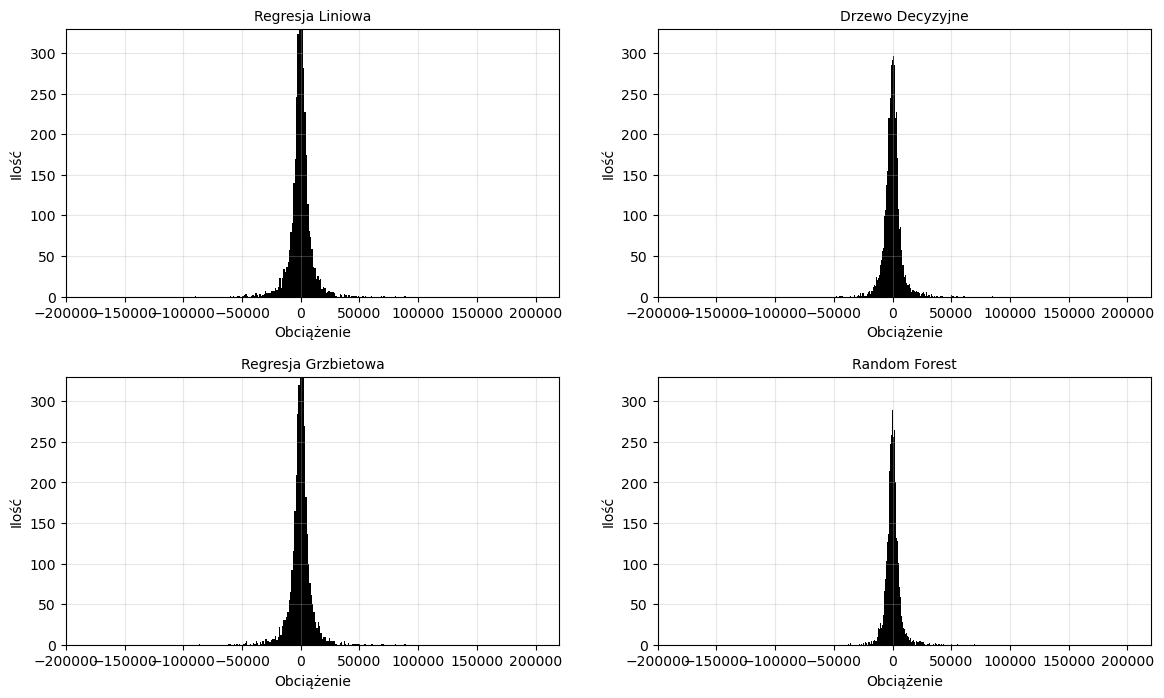

In [56]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

cols = ['lm_bias', 'ridge_bias', 'tree_bias', 'rf_bias']
titles = ['Regresja Liniowa', 'Regresja Grzbietowa', 'Drzewo Decyzyjne', 'Random Forest']

for row, col in enumerate(cols[:2]):

    axs[row, 0].hist(df_agg[col], bins=150, color='black')
    axs[row, 0].grid(alpha=0.3)
    axs[row, 0].set_title(titles[row], fontsize=10)

    axs[row, 0].set_ylabel('Ilość')
    axs[row,0].set_xlabel('Obciążenie')
    # axs[row,0].set_xlim([-80000, 80000]) #sim1
    # axs[row,0].set_ylim([0, 600]) #sim1
    # axs[row,0].set_xlim([-75000, 85000]) #sim2
    # axs[row,0].set_ylim([0, 400]) #sim2
    axs[row,0].set_xlim([-200000, 220000]) #sim3
    axs[row,0].set_ylim([0, 330]) #sim3

for row, col in enumerate(cols[2:]):

    axs[row, 1].hist(df_agg[col], bins=150, color='black')
    axs[row, 1].grid(alpha=0.3)
    axs[row, 1].set_title(titles[row+2], fontsize=10)
    axs[row, 1].set_ylabel('Ilość')
    axs[row,1].set_xlabel('Obciążenie')
    # axs[row,1].set_xlim([-80000, 80000]) #sim1
    # axs[row,1].set_ylim([0, 600]) #sim1
    # axs[row,1].set_xlim([-75000, 85000]) #sim2
    # axs[row,1].set_ylim([0, 400]) #sim2
    axs[row,1].set_xlim([-200000, 220000]) #sim3
    axs[row,1].set_ylim([0, 330]) #sim3

plt.subplots_adjust(hspace=0.3)
plt.show()


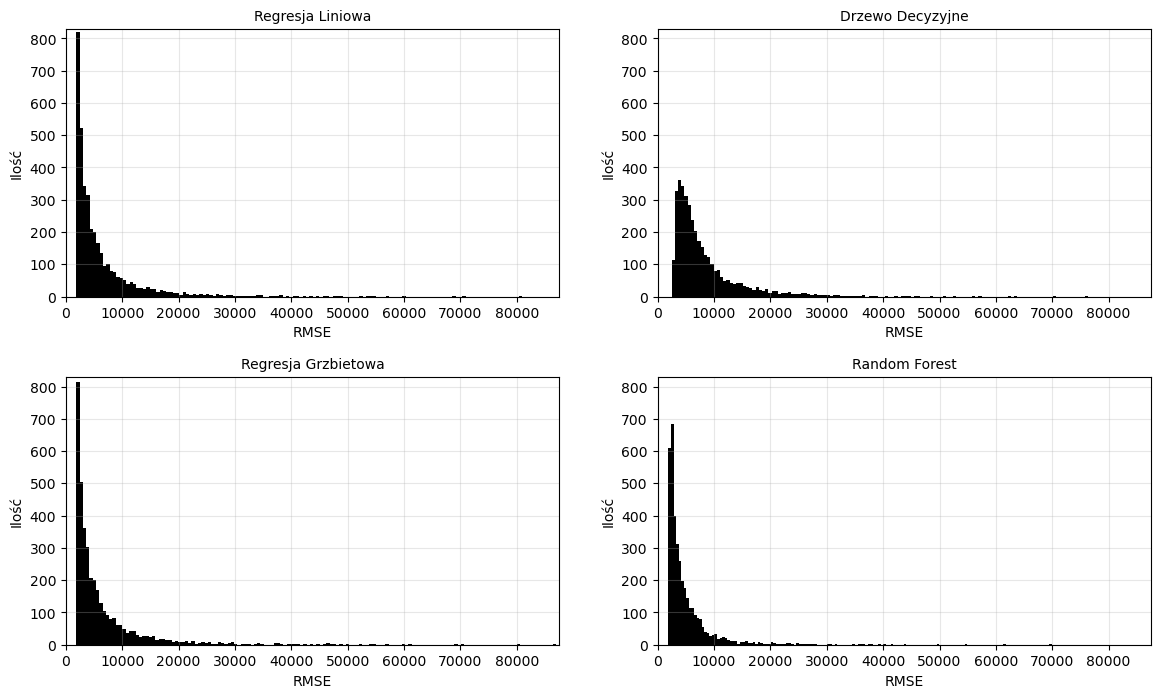

In [64]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

cols = ['lm_rmse', 'tree_rmse','ridge_rmse', 'rf_rmse']
titles = ['Regresja Liniowa', 'Drzewo Decyzyjne','Regresja Grzbietowa',  'Random Forest']

for idx, col in enumerate(cols):

    ax = axs.flatten()[idx]
    ax.hist(df_agg[col], bins=150, color='black')
    ax.grid(alpha=0.3)
    ax.set_title(titles[idx], fontsize=10)
    ax.set_ylabel('Ilość')
    ax.set_xlabel('RMSE')
    # ax.set_xlim([20000, 90000]) # sim1
    # ax.set_ylim([0,400])
    ax.set_xlim([0, 87500]) # sim2
    ax.set_ylim([0,830]) #sim2
    # ax.set_xlim([0, 270000]) # sim3
    # ax.set_ylim([0,720]) #sim3    

plt.subplots_adjust(hspace=0.3)
plt.show()


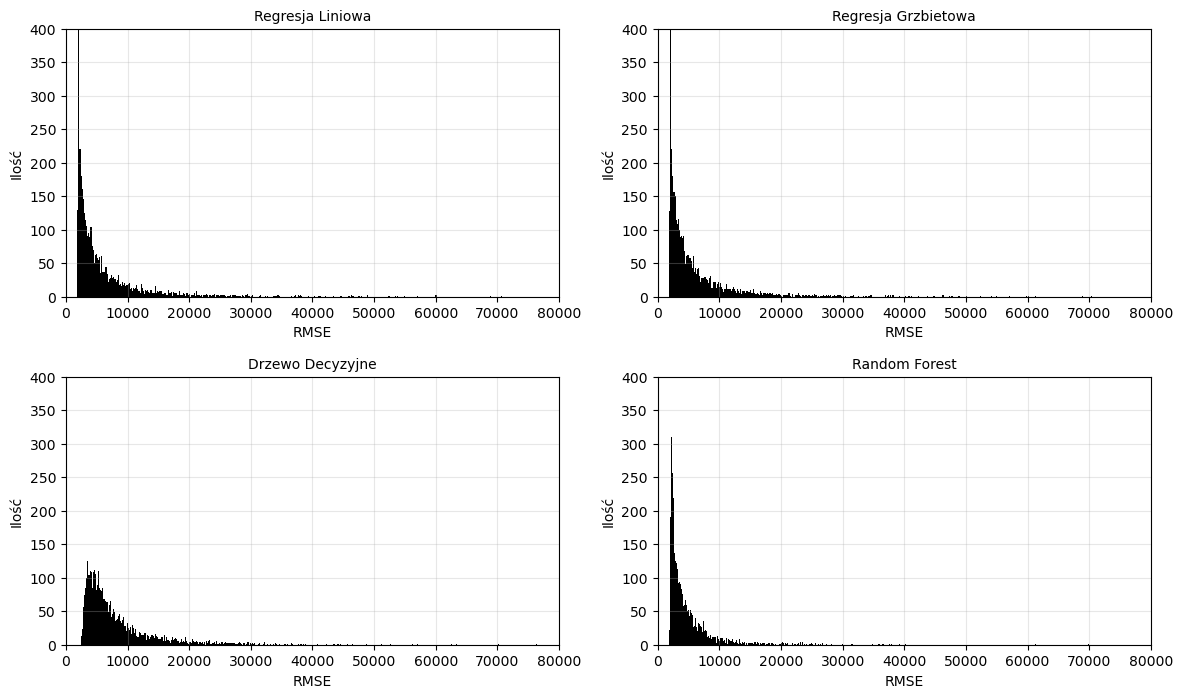

In [62]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

cols = ['lm_rmse', 'ridge_rmse', 'tree_rmse', 'rf_rmse']
titles = ['Regresja Liniowa', 'Regresja Grzbietowa', 'Drzewo Decyzyjne', 'Random Forest']

for idx, col in enumerate(cols):

    ax = axs.flatten()[idx]
    ax.hist(df_agg[col], bins=500, color='black')
    ax.grid(alpha=0.3)
    ax.set_title(titles[idx], fontsize=10)
    ax.set_ylabel('Ilość')
    ax.set_xlabel('RMSE')
    # ax.set_xlim([20000, 90000]) # sim1
    # ax.set_ylim([0,400])
    ax.set_xlim([0, 80000]) # sim2
    ax.set_ylim([0,400]) #sim2
    # ax.set_xlim([0, 250000]) # sim3
    # ax.set_ylim([0,300]) #sim3    

plt.subplots_adjust(hspace=0.3)
plt.show()


In [111]:
model1 = df_agg.copy()
model1['model'] = 1
model1 = model1[['model', 'lm_rmse', 'ridge_rmse', 'tree_rmse', 'rf_rmse']]

In [117]:
model2 = df_agg.copy()
model2['model'] = 2
model2 = model2[['model', 'lm_rmse', 'ridge_rmse', 'tree_rmse', 'rf_rmse']]

In [122]:
model3 = df_agg.copy()
model3['model'] = 3
model3 = model3[['model', 'lm_rmse', 'ridge_rmse', 'tree_rmse', 'rf_rmse']]

In [123]:
df = pd.concat([model1,model2,model3]).reset_index(drop=True)
df.rename(columns={'lm_rmse': 'Regresja Liniowa', 'ridge_rmse':'Regresja Grzbietowa', 'tree_rmse': 'Drzewo Decyzyjne', 'rf_rmse':'Random Forest'}, inplace=True)

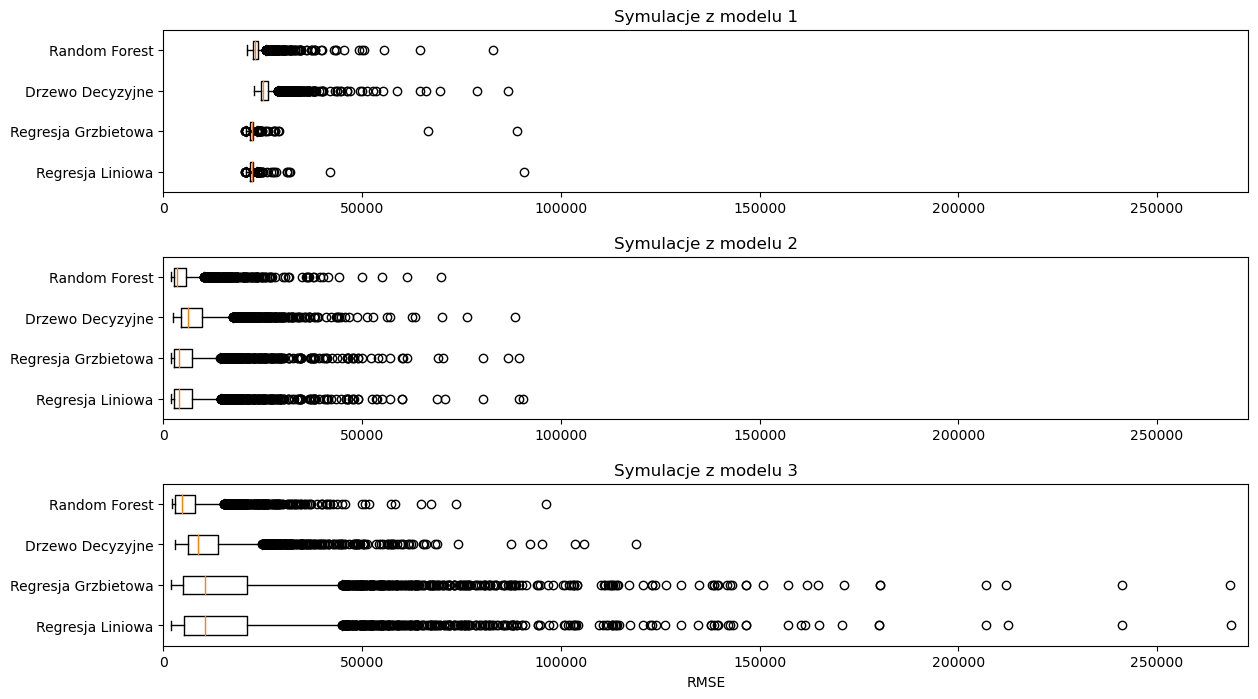

In [130]:
fig, axs = plt.subplots(3,1, figsize=(14,8))

nazwy = ['Regresja Liniowa', 'Regresja Grzbietowa', 'Drzewo Decyzyjne', 'Random Forest']
titles = ['Symulacje z modelu 1', 'Symulacje z modelu 2', 'Symulacje z modelu 3']

for i in range(0,3):
    axs[i].boxplot(df[df['model'] == i+1][['Regresja Liniowa', 'Regresja Grzbietowa', 'Drzewo Decyzyjne', 'Random Forest']], vert=False)
    axs[i].set_yticklabels(nazwy)
    axs[i].set_xlim([0, 273000])
    axs[i].set_title(titles[i])
axs[i].set_xlabel('RMSE')

plt.subplots_adjust(hspace=0.4)
plt.show()

KeyError: "None of [Index(['Regresja Liniowa', 'Regresja Grzbietowa', 'Drzewo Decyzyjne',\n       'Random Forest'],\n      dtype='object')] are in the [columns]"

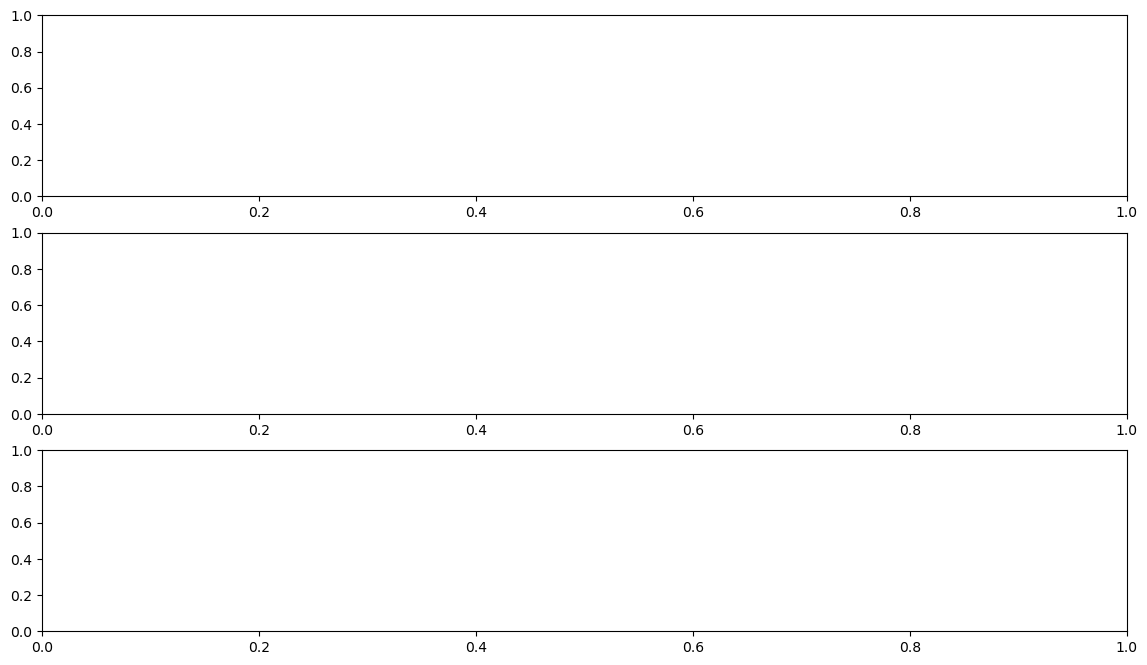

In [81]:
fig, axs = plt.subplots(3,1, figsize=(14,8))

nazwy = ['Regresja Liniowa', 'Regresja Grzbietowa', 'Drzewo Decyzyjne', 'Random Forest']
titles = ['Symulacje z modelu 1', 'Symulacje z modelu 2', 'Symulacje z modelu 3']

for i in range(0,3):
    axs[i].boxplot(df[df['model'] == i+1][['Regresja Liniowa', 'Regresja Grzbietowa', 'Drzewo Decyzyjne', 'Random Forest']], vert=False)
    axs[i].set_yticklabels(nazwy)
    axs[i].set_xlim([0, 250000])
    axs[i].set_title(titles[i])
axs[i].set_xlabel('RMSE')

plt.subplots_adjust(hspace=0.4)
plt.show()